## Dataset details and links ##

The sample dataset is taken from the Tableau public webiste where there is a beautiful rendition of how the variables are to be viewed in the form of a dashboard. 
However the df_extra dataset is a random dataset which is synthetically generated. The source cannot be disclosed in this particular notebook.
- The link to the dashboard is here : https://www.tableau.com/data-insights/dashboard-showcase/superstore
- The link to the datasets are : https://drive.google.com/drive/folders/1Jm5hRf0OFIC9X10CKwmuUHpR0gwCHRHT?usp=share_link

This notebook attempts to discover secret patterns in the dataset using a lot of statistical measures and indepedent graphical representations of the data. 

**Details on how the notebook is to be viewed and handled**
- The custom made functions that are used in the notebook are imported from the functions.py file in the same directory so that the main goal of the project is not being deviated (if only functions are required and not otherwise)
- This particular notebook contains all the information that not plagiarised from any sources. This is a completely independent work and people are open to take references from this notebook.
- The datasets used for this particular analysis holds no connection with any personal information and all of this is completely available in the internet for personal usage.
- This notebook is to be used exclusively for education purposes and not professional uses because the validity of the data is something that cannot be checked on very accurately.

**Importing the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import warnings
warnings.filterwarnings('ignore')
import datetime
import math
from functions import col_names

In [2]:
#importing the required datasets
df_orders = pd.read_excel(r"C:\Users\subha\Downloads\sample_-_superstore.xlsx", sheet_name= 'Orders')
df_returns = pd.read_excel(r"C:\Users\subha\Downloads\sample_-_superstore.xlsx", sheet_name = "Returns")
df_people = pd.read_excel(r"C:\Users\subha\Downloads\sample_-_superstore.xlsx", sheet_name = "People")
df_extra = pd.read_csv(r"C:\Users\subha\Downloads\Superstore event data.xlsx - Sheet1.csv")

print(df_orders.shape, df_returns.shape, df_people.shape, df_extra.shape)

(9994, 21) (296, 2) (4, 2) (136, 4)


In [3]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
df_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [5]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Person  4 non-null      object
 1   Region  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


In [6]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Promotion Date  136 non-null    object
 1   Manufacturer    136 non-null    object
 2   Category        136 non-null    object
 3   Promotion Type  136 non-null    object
dtypes: object(4)
memory usage: 4.4+ KB


In [7]:
#formatting the column names for each and every dataframes
dataframes = [df_orders, df_returns, df_people, df_extra]
for i in dataframes:
    col_names(i)
print(df_orders.columns, df_returns.columns, df_people.columns, df_extra.columns)

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object') Index(['returned', 'order_id'], dtype='object') Index(['person', 'region'], dtype='object') Index(['promotion_date', 'manufacturer', 'category', 'promotion_type'], dtype='object')


In [8]:
#formatting the datapoints in the dataframes and adding the columns that are required
df_orders['cost_price'] = df_orders['sales'] - df_orders['profit']
df_orders['selling_price'] = df_orders['cost_price'] / (1- df_orders['discount'])
df_orders['total_revenue'] = df_orders['selling_price'] * df_orders['quantity']
df_orders['gross_profit'] = df_orders['total_revenue'] - df_orders['cost_price']
df_orders['gross_margin'] = (df_orders['gross_profit'] / df_orders['total_revenue'])*100
df_orders.head(3)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_name,sales,quantity,discount,profit,cost_price,selling_price,total_revenue,gross_profit,gross_margin
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,220.0464,220.0464,440.0928,220.0464,50.000000
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,512.3580,512.3580,1537.0740,1024.7160,66.666667
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,7.7486,7.7486,15.4972,7.7486,50.000000


**Additional Parameters that can be derived from the given data**

- Gross profit: Gross profit is the difference between revenue and cost of goods sold (COGS). It can be calculated by subtracting the COGS from the revenue. The formula for gross profit is: Gross Profit = Revenue - COGS.

- Gross margin: Gross margin is the percentage of revenue that exceeds COGS. It can be calculated by dividing gross profit by revenue and multiplying the result by 100. The formula for gross margin is: Gross Margin = (Gross Profit / Revenue) * 100.

- Average order value: Average order value is the average amount of revenue generated per order. It can be calculated by dividing the total revenue by the number of orders. The formula for average order value is: Average Order Value = Total Revenue / Number of Orders.

- Sales growth: Sales growth is the percentage increase or decrease in revenue over a specific period of time. It can be calculated by subtracting the previous period's revenue from the current period's revenue, dividing the result by the previous period's revenue, and multiplying the result by 100. The formula for sales growth is: Sales Growth = ((Current Period Revenue - Previous Period Revenue) / Previous Period Revenue) * 100.

- Customer lifetime value: Customer lifetime value is the total revenue generated by a customer over their entire relationship with the business. It can be calculated by multiplying the average order value by the number of orders per customer and the average customer lifespan. The formula for customer lifetime value is: Customer Lifetime Value = Average Order Value * Number of Orders per Customer * Average Customer Lifespan.

- Profit Margin: Profit margin is the ratio of profit to revenue. It measures the profitability of a company's products or services. It can be calculated as (profit / revenue) x 100.

- Discount Percentage: Discount percentage is the percentage of discount given on each product. It can be calculated as (discount / selling price) x 100.

- Sales Growth: Sales growth is the percentage change in revenue over a period of time. It can be calculated as ((current period revenue - previous period revenue) / previous period revenue) x 100.

- Customer Lifetime Value: Customer lifetime value is the amount of revenue a customer is expected to generate over the course of their relationship with a company. It can be calculated as (average revenue per customer x average customer lifespan).

In [9]:
df_orders.head(3)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_name,sales,quantity,discount,profit,cost_price,selling_price,total_revenue,gross_profit,gross_margin
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,220.0464,220.0464,440.0928,220.0464,50.000000
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,512.3580,512.3580,1537.0740,1024.7160,66.666667
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,7.7486,7.7486,15.4972,7.7486,50.000000


In [10]:
df = pd.merge(df_orders, df_returns , how = "left", on= 'order_id')
df.drop_duplicates(inplace = True)
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,sales,quantity,discount,profit,cost_price,selling_price,total_revenue,gross_profit,gross_margin,returned
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,220.0464,220.0464,440.0928,220.0464,50.000000,NaN
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,512.3580,512.3580,1537.0740,1024.7160,66.666667,NaN
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,7.7486,7.7486,15.4972,7.7486,50.000000,NaN
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,1340.6085,2437.4700,12187.3500,10846.7415,89.000000,NaN
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,19.8516,24.8145,49.6290,29.7774,60.000000,NaN


In [11]:
#filling up the missing values which is only present in the returned column with "No" values
df.returned.fillna("No", inplace = True)

In [12]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit', 'cost_price',
       'selling_price', 'total_revenue', 'gross_profit', 'gross_margin',
       'returned'],
      dtype='object')

In [40]:
df.to_csv("final_df.csv")

## Exploratory Data Analysis using both SQL and Python ##

In [15]:
#import the library for SQL queries to run in python. Here we will be using sqldf in order to query and explore more about the dataset in python
from pandasql import sqldf

In [16]:
#checking whether the library works on the given data or not
print(sqldf("""select * from df limit 5"""))

   row_id        order_id                  order_date  \
0       1  CA-2016-152156  2016-11-08 00:00:00.000000   
1       2  CA-2016-152156  2016-11-08 00:00:00.000000   
2       3  CA-2016-138688  2016-06-12 00:00:00.000000   
3       4  US-2015-108966  2015-10-11 00:00:00.000000   
4       5  US-2015-108966  2015-10-11 00:00:00.000000   

                    ship_date       ship_mode customer_id    customer_name  \
0  2016-11-11 00:00:00.000000    Second Class    CG-12520      Claire Gute   
1  2016-11-11 00:00:00.000000    Second Class    CG-12520      Claire Gute   
2  2016-06-16 00:00:00.000000    Second Class    DV-13045  Darrin Van Huff   
3  2015-10-18 00:00:00.000000  Standard Class    SO-20335   Sean O'Donnell   
4  2015-10-18 00:00:00.000000  Standard Class    SO-20335   Sean O'Donnell   

     segment        country             city  ...     sales  quantity  \
0   Consumer  United States        Henderson  ...  261.9600         2   
1   Consumer  United States        Henders

In [20]:
#generating top revenue generating cities in the US
print(sqldf("""select * from (
select city, sum(total_revenue) as city_revenue
from df
group by city)
order by city_revenue desc limit 5"""))

            city  city_revenue
0  New York City  1.072436e+06
1   Philadelphia  1.060734e+06
2    Los Angeles  8.400207e+05
3        Houston  7.561019e+05
4        Chicago  5.401032e+05


In [23]:
#which shipping mode is mostly used by the business
print(sqldf("""select * from (
select ship_mode, count(order_id) as order_count
from df
group by ship_mode)
order by order_count desc limit 5"""))

        ship_mode  order_count
0  Standard Class         5968
1    Second Class         1945
2     First Class         1538
3        Same Day          543


1. Sales Analysis:
- Identify the top-selling products and categories based on sales revenue.
- Analyze the sales trends over time to understand seasonality and growth patterns.

In [47]:
#top selling categories and products

print("The top selling categories as per the total_revenue generated is ",sqldf("""select * from (
select category, sum(total_revenue) as sum_revenue
from df
group by category)
order by sum_revenue desc"""))

print("The top selling products as per the total_revenue generated is ", sqldf("""select * from (
select product_name, sum(total_revenue) as sum_revenue
from df
group by product_name)
order by sum_revenue desc limit 10"""))

The top selling categories as per the total_revenue generated is            category   sum_revenue
0        Furniture  4.942547e+06
1  Office Supplies  4.635193e+06
2       Technology  4.547860e+06
The top selling products as per the total_revenue generated is                                          product_name    sum_revenue
0          GBC DocuBind P400 Electric Binding System  367896.011850
1   GBC Ibimaster 500 Manual ProClick Binding System  305913.960000
2  Cisco TelePresence System EX90 Videoconferenci...  293394.700800
3          Lexmark MX611dhe Monochrome Laser Printer  249237.422778
4          Cubify CubeX 3D Printer Double Head Print  225699.247667
5         GBC DocuBind TL300 Electric Binding System  199630.356942
6  Fellowes PB500 Electric Punch Plastic Comb Bin...  198751.061250
7  Chromcraft Bull-Nose Wood Oval Conference Tabl...  182547.938700
8              Canon imageCLASS 2200 Advanced Copier  175932.830667
9       HON 5400 Series Task Chairs for Big and Tall  1624

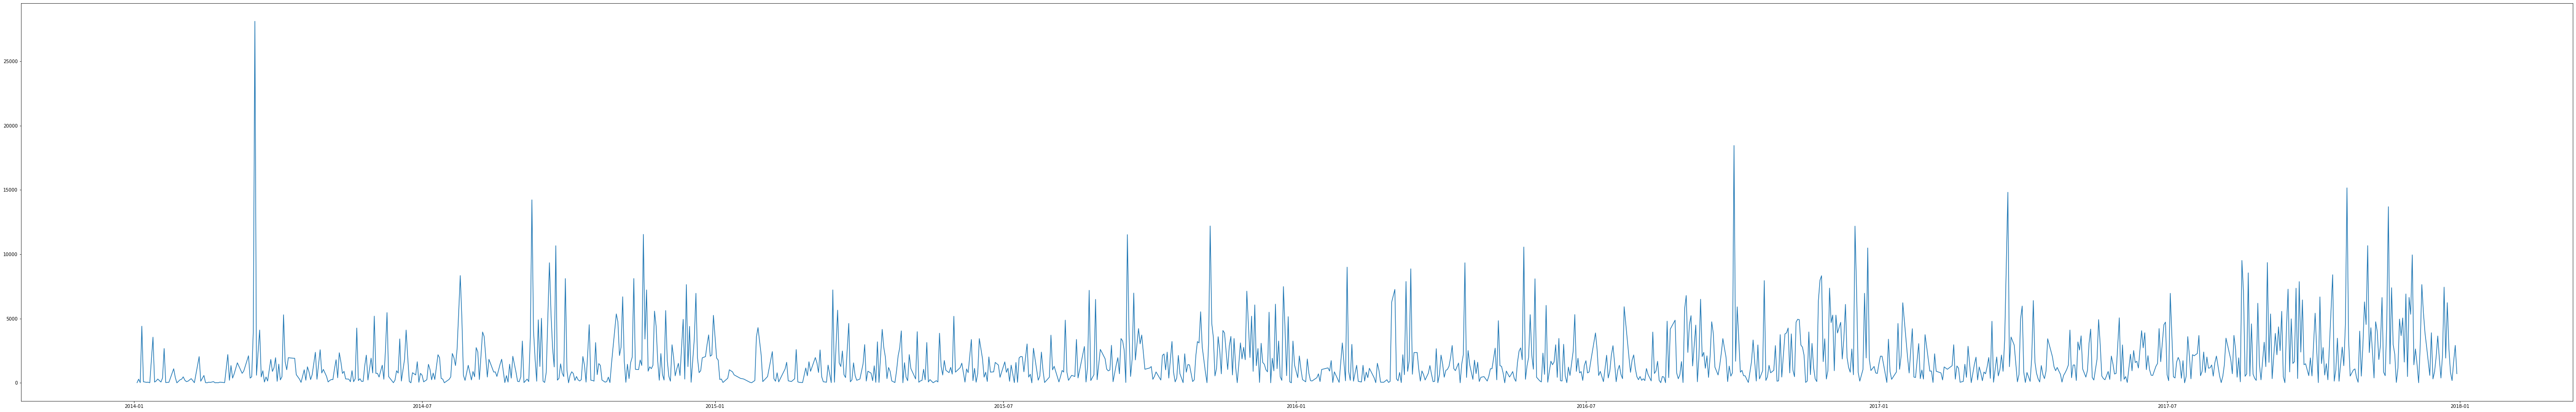

In [45]:
#sales trends to understand the seasonality and growth patterns
df_sales_grouped = df.groupby('order_date')['sales'].sum()
plt.figure(figsize = (100,16))
plt.plot(df_sales_grouped)

In [48]:
##This code is to be rechecked again about it functionalities and then derive conclusions out of it.

# from statsmodels.tsa.seasonal import seasonal_decompose
# #setting date as the index of the given data
# df_copy = df.set_index('order_date')
# analysis = df_copy['sales'].copy()

# decompose_result = seasonal_decompose(analysis, model = "multiplicative")
# trend = decompose_result.trend
# seasonal = decompose_result.seasonal
# residual = decompose_result.resid
# decompose_result.plot()

2. Profitability Assessment:
- Calculate the profit and profit margins for different segments, categories, and sub-categories.
- Investigate the products with the highest and lowest profits.

In [51]:
#profit margin is defined as (profit/net revenue) * 100
#profit and profit margins for give categories of products are:

print(sqldf("""
select category, (profit/total_revenue)*100 as profit_margin
from df
group by category
order by profit_margin desc"""))

          category  profit_margin
0  Office Supplies      44.339623
1        Furniture       9.523810
2       Technology       1.481481


In [58]:
#top 10 products with the maximum profit margins are

print(sqldf("""
select product_name, category, (profit/total_revenue)*100 as profit_margin
from df
group by product_name, category
order by profit_margin desc limit 10"""))

                                        product_name         category  \
0                        Prang Dustless Chalk Sticks  Office Supplies   
1                                         Xerox 1949  Office Supplies   
2                                         Xerox 1987  Office Supplies   
3                              Avery Durable Binders  Office Supplies   
4                                         Xerox 1908  Office Supplies   
5                                         Xerox 1966  Office Supplies   
6                                         Xerox 1993  Office Supplies   
7  Adams Telephone Message Book W/Dividers/Space ...  Office Supplies   
8                                         Xerox 1945  Office Supplies   
9                                         Xerox 1983  Office Supplies   

   profit_margin  
0     100.000000  
1      96.078431  
2      96.078431  
3      96.078431  
4      96.078431  
5      96.078431  
6      96.078431  
7      96.078431  
8      96.078431  
9     

In [59]:
#top 10 products with the lowest profit margins are

print(sqldf("""
select product_name, category, (profit/total_revenue)*100 as profit_margin
from df
group by product_name, category
order by profit_margin limit 10"""))

                                        product_name         category  \
0  Chromcraft Bull-Nose Wood Round Conference Tab...        Furniture   
1  Atlantic Metals Mobile 2-Shelf Bookcases, Cust...        Furniture   
2              Safco Industrial Wire Shelving System  Office Supplies   
3                      Master Caster Door Stop, Gray        Furniture   
4                         Contract Clock, 14", Brown        Furniture   
5  Safco Value Mate Series Steel Bookcases, Baked...        Furniture   
6  Zebra GX420t Direct Thermal/Thermal Transfer P...       Technology   
7  Martin Yale Chadless Opener Electric Letter Op...  Office Supplies   
8  Holmes Visible Mist Ultrasonic Humidifier with...  Office Supplies   
9                          Safco Commercial Shelving  Office Supplies   

   profit_margin  
0     -19.879518  
1     -17.323944  
2     -16.000000  
3     -15.757576  
4     -15.757576  
5     -15.277778  
6     -14.788732  
7     -14.693878  
8     -13.939394  
9     

3. Shipping Efficiency:
- Analyze the relationship between shipping mode and delivery times to optimize the shipping process.
- Identify regions or cities with longer shipping times and propose improvements.

In [67]:
df['order_ship_diff'] = df['ship_date'] - df['order_date']
df['order_ship_diff'].value_counts()

4 days    2774
5 days    2169
2 days    1334
6 days    1203
3 days    1005
7 days     621
0 days     519
1 days     369
Name: order_ship_diff, dtype: int64

In [75]:
#products with greater shipping dates
df_products_ship = df.loc[df['order_ship_diff'] == "7 days"].product_name.value_counts()
df_products_ship

Staples                                                 5
Eldon Wave Desk Accessories                             4
Xerox 203                                               3
invisibleSHIELD by ZAGG Smudge-Free Screen Protector    3
Xerox 222                                               3
                                                       ..
Apple iPhone 5S                                         1
Things To Do Today Spiral Book                          1
Binder Clips by OIC                                     1
Global Push Button Manager's Chair, Indigo              1
Acme Serrated Blade Letter Opener                       1
Name: product_name, Length: 515, dtype: int64